In [1]:
import pandas as pd

df = pd.read_csv("heart_2020_cleaned.csv")

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
cathegoric_columns = df.select_dtypes(include=['object']).columns.drop('HeartDisease')

numeric_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer(
    transformers=[
        ("numerical", MinMaxScaler(), numeric_columns),
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categoric_columns),
    ]
)

TypeError: MinMaxScaler.__init__() got an unexpected keyword argument 'with_mean'

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Stratified split to preserve class distribution
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_test, X_verify, y_test, y_verify = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [9]:
from sklearn.svm import LinearSVC

model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("svm", LinearSVC(random_state=42, class_weight="balanced", max_iter=5000))
    ]
)

model.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Accuracy: 0.7466
Balanced accuracy: 0.7616
Precision (macro): 0.5973
Recall (macro): 0.7616
F1 (macro): 0.5940
Precision (weighted): 0.9087
Recall (weighted): 0.7466
F1 (weighted): 0.8003
ROC-AUC: 0.8405
Average Precision (PR-AUC): 0.3475

Classification report:
               precision    recall  f1-score   support

          No     0.9730    0.7435    0.8429     43863
         Yes     0.2215    0.7796    0.3450      4106

    accuracy                         0.7466     47969
   macro avg     0.5973    0.7616    0.5940     47969
weighted avg     0.9087    0.7466    0.8003     47969

Confusion matrix:
 [[32613 11250]
 [  905  3201]]


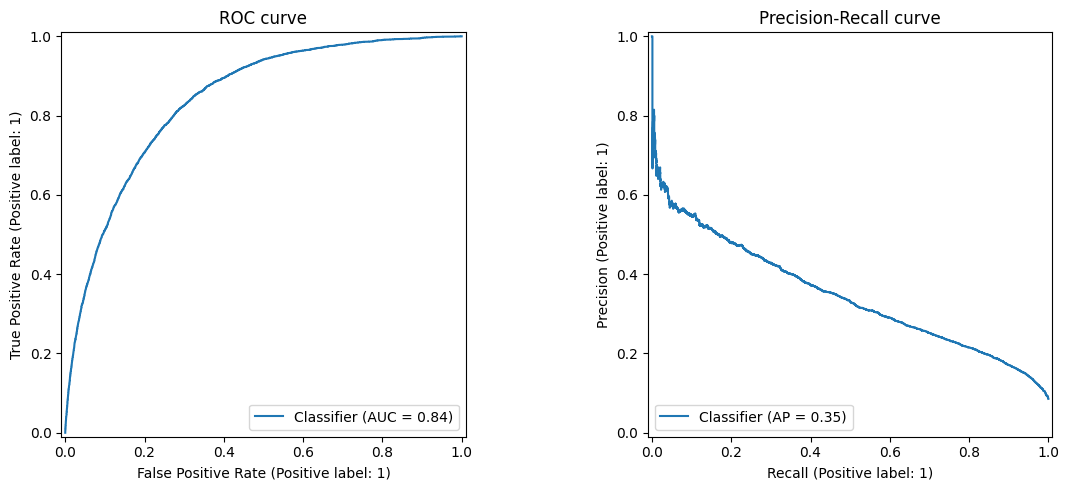

In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
    roc_auc_score,
    average_precision_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
# For LinearSVC, use decision_function scores
scores = model.decision_function(X_test)

y_true_bin = (y_test == "Yes").astype(int)

# Scalar metrics
acc = accuracy_score(y_test, y_pred)
prec_macro = precision_score(y_test, y_pred, average="macro", zero_division=0)
rec_macro = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1_macro = f1_score(y_test, y_pred, average="macro", zero_division=0)
prec_weighted = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec_weighted = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1_weighted = f1_score(y_test, y_pred, average="weighted", zero_division=0)
bal_acc = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_true_bin, scores)
ap = average_precision_score(y_true_bin, scores)

print(f"Accuracy: {acc:.4f}")
print(f"Balanced accuracy: {bal_acc:.4f}")
print(f"Precision (macro): {prec_macro:.4f}")
print(f"Recall (macro): {rec_macro:.4f}")
print(f"F1 (macro): {f1_macro:.4f}")
print(f"Precision (weighted): {prec_weighted:.4f}")
print(f"Recall (weighted): {rec_weighted:.4f}")
print(f"F1 (weighted): {f1_weighted:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Average Precision (PR-AUC): {ap:.4f}")

print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Curves
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
RocCurveDisplay.from_predictions(y_true_bin, scores, ax=axes[0])
axes[0].set_title("ROC curve")
PrecisionRecallDisplay.from_predictions(y_true_bin, scores, ax=axes[1])
axes[1].set_title("Precision-Recall curve")
plt.tight_layout()
plt.show()